In [1]:
import cv2
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [41]:
df=pd.read_csv("E:\df_v3.csv",index_col=False)
df=df.drop(["Unnamed: 0"],axis=1)
df

,0,1,2,3,4,5,6,7,8,9,...,6391,6392,6393,6394,6395,6396,6397,6398,6399,target
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00000,1.0,1
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.74902,1.0,1
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00000,1.0,1
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00000,1.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.00000,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.00000,0.0,0
10011,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00000,1.0,0
10012,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00000,1.0,4
10013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,1


In [42]:
from sklearn.model_selection import train_test_split
y=df.target
x_train,x_test,y_train,y_test=train_test_split(df.drop(["target"],axis=1),y,test_size=0.2)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(8012, 6400)
(8012,)
(2003, 6400)
(2003,)


In [43]:
df1=pd.DataFrame(y_test)
df2=pd.DataFrame(x_test)
df=pd.concat([df2,df1],axis=1)
print(df.shape)

(2003, 6401)


In [44]:
df.to_csv("test_data_final.csv")

In [78]:
df1=pd.DataFrame(y_train)
df2=pd.DataFrame(x_train)
df=pd.concat([df2,df1],axis=1)
print(df.shape)

(8012, 6401)


In [79]:
df_grouped=df.groupby(["target"])

In [80]:
arr=[]
for i in range(0,7):
    temp_df=df_grouped.get_group((i))
    #print(len(temp))
    temp_df=temp_df.drop(["target"],axis=1)
    temp1=[]
    for j in range(len(temp_df)):
        temp=np.array(temp_df.iloc[i,:])
        #print(temp)
        temp=temp.reshape(80,80)
        temp1.append(temp)
        
    arr.append(temp1)
arr       

[[array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]),
  array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]),
  array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]),
  array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 

In [81]:
def augment(img):
    img1 = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
    img2 = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
    img3 = cv2.rotate(img, cv2.ROTATE_180)
    a=[img1,img2,img3]
    img_ran1=random.sample(a,1) 
    img_ran1=np.array(img_ran1).reshape(80,80)
   # plt.imshow(img_ran1)
    img4 = cv2.flip(img_ran1, 0)
    img5 = cv2.flip(img_ran1, 1)
    a=[img4,img5]
    img_ran2=random.sample(a,1)
    img_ran2=np.array(img_ran2).reshape(80,80)
    a=[img_ran1,img_ran2]
    
    return random.sample(a,1)

In [82]:
df["target"].value_counts()

1    5354
0     898
4     887
2     409
3     256
6     114
5      94
Name: target, dtype: int64

In [83]:
len(arr[0])

898

In [84]:
for i in range(200):
    #print(len(random.sample(arr[0],1)))
    temp=augment(np.array(random.sample(arr[0],1)).reshape(80,80))
    temp=np.array(temp).reshape(80,80)
    arr[0].append(temp)
    
    

In [85]:
len(arr[0])

1098

In [86]:
len(arr[4])

887

In [87]:
for i in range(220):
    #print(len(random.sample(arr[0],1)))
    temp=augment(np.array(random.sample(arr[4],1)).reshape(80,80))
    temp=np.array(temp).reshape(80,80)
    arr[4].append(temp)

In [88]:
len(arr[4])

1107

In [89]:
len(arr[2])

409

In [90]:
for i in range(500):
    #print(len(random.sample(arr[0],1)))
    temp=augment(np.array(random.sample(arr[2],1)).reshape(80,80))
    temp=np.array(temp).reshape(80,80)
    arr[2].append(temp)

In [91]:
len(arr[2])

909

In [92]:
len(arr[3])

256

In [93]:
for i in range(650):
    #print(len(random.sample(arr[0],1)))
    temp=augment(np.array(random.sample(arr[3],1)).reshape(80,80))
    temp=np.array(temp).reshape(80,80)
    arr[3].append(temp)

In [94]:
len(arr[3])

906

In [95]:
len(arr[5])

94

In [96]:
for i in range(810):
    #print(len(random.sample(arr[0],1)))
    temp=augment(np.array(random.sample(arr[5],1)).reshape(80,80))
    temp=np.array(temp).reshape(80,80)
    arr[5].append(temp)

In [97]:
len(arr[5])

904

In [98]:
len(arr[6])

114

In [99]:
for i in range(900):
    #print(len(random.sample(arr[0],1)))
    temp=augment(np.array(random.sample(arr[6],1)).reshape(80,80))
    temp=np.array(temp).reshape(80,80)
    arr[6].append(temp)

In [100]:
len(arr[6])

1014

In [101]:
for i in range(7):
    print(len(arr[i]))

1098
5354
909
906
1107
904
1014


In [102]:
arr[1]

[array([[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 arr

In [103]:
#new_arr=[]
n=3000
new_arr=random.sample(arr[1],n) 
(new_arr)

[array([[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 arr

In [63]:
arr[1]=new_arr
len(arr[1])

3000

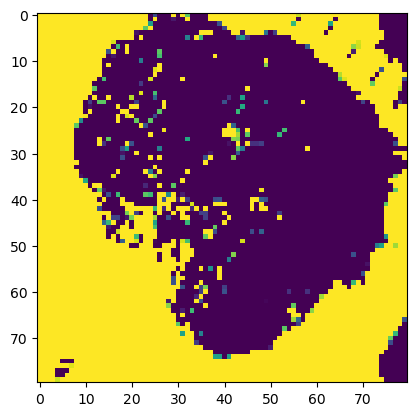

In [64]:
plt.imshow(arr[4][101])

In [65]:
ans=0
target=[]
for i in range(len(arr)):
    ans+=len(arr[i])
    for j in range(len(arr[i])):
        target.append(i)
print(ans)

8938


In [66]:
target=np.array(target)
pd.Series(target).value_counts()

1    3000
4    1107
0    1098
6    1014
2     909
3     906
5     904
dtype: int64

In [67]:
data=[]
for i in range(len(arr)):
    for j in range(len(arr[i])):
        data.append(arr[i][j])
        
len(data)

8938

In [70]:
data_flat=[]
for i in range(len(data)):
    temp=np.array(data[i]).flatten()
    data_flat.append(np.array(temp))
data_flat

[array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 

In [71]:
df=pd.DataFrame(data_flat)
df

,0,1,2,3,4,5,6,7,8,9,...,6390,6391,6392,6393,6394,6395,6396,6397,6398,6399
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.74902,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.74902,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.74902,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.74902,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.74902,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8933,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00000,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
8934,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00000,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
8935,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00000,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
8936,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00000,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [72]:
df["target"]=target
df

,0,1,2,3,4,5,6,7,8,9,...,6391,6392,6393,6394,6395,6396,6397,6398,6399,target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.74902,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.74902,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.74902,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.74902,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.74902,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8933,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00000,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6
8934,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00000,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6
8935,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00000,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6
8936,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00000,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6


In [73]:
df=df.sample(frac=1)
df

,0,1,2,3,4,5,6,7,8,9,...,6391,6392,6393,6394,6395,6396,6397,6398,6399,target
6843,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,1.000000,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.000000,4
7638,1.0,1.0,1.0,1.0,1.0,1.0,1.00000,1.0,1.0,1.0,...,1.000000,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,0.686275,5
8757,1.0,1.0,1.0,1.0,1.0,1.0,1.00000,1.0,1.0,1.0,...,1.000000,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.000000,6
4775,0.0,0.0,0.0,0.0,0.0,0.0,0.25098,1.0,1.0,1.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,2
1096,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7505,1.0,1.0,1.0,1.0,1.0,1.0,1.00000,1.0,0.0,1.0,...,0.000000,0.0,1.0,1.0,0.0,0.811765,1.0,0.0,0.686275,5
7625,1.0,1.0,1.0,1.0,1.0,0.0,1.00000,1.0,1.0,1.0,...,0.235294,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,0.250980,5
8049,1.0,1.0,1.0,1.0,1.0,1.0,1.00000,1.0,1.0,1.0,...,1.000000,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.000000,6
8686,1.0,1.0,1.0,1.0,1.0,1.0,1.00000,1.0,1.0,1.0,...,1.000000,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.000000,6


In [74]:
df=df.sample(frac=1)
df

,0,1,2,3,4,5,6,7,8,9,...,6391,6392,6393,6394,6395,6396,6397,6398,6399,target
639,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.74902,1.0,1.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0
1191,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.00000,1.0,1.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,1
6346,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.00000,1.0,1.0,...,1.0,1.0,1.00000,1.0,0.0,0.0,0.0,0.0,0.0,4
8532,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.00000,1.0,1.0,...,1.0,1.0,1.00000,1.0,1.0,1.0,1.0,1.0,1.0,6
8739,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.00000,1.0,1.0,...,1.0,1.0,1.00000,1.0,1.0,1.0,1.0,1.0,1.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3125,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.00000,1.0,1.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,1
4532,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,...,1.0,1.0,0.25098,0.0,0.0,0.0,0.0,0.0,0.0,2
2456,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.00000,1.0,1.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,1
1198,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.00000,1.0,1.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,1


In [76]:
df.to_csv("E:\df_v4_final.csv")

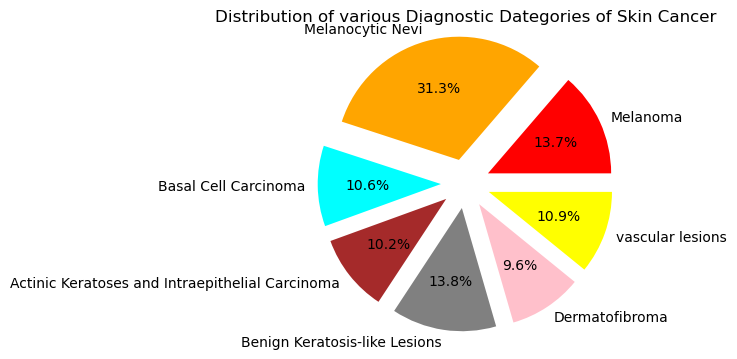

In [77]:
names = ['Melanoma', 'Melanocytic Nevi', 'Basal Cell Carcinoma',
        'Actinic Keratoses and Intraepithelial Carcinoma', 'Benign Keratosis-like Lesions', 'Dermatofibroma',"vascular lesions"]
data = [1313, 3000, 1014, 977, 1319, 925,1042]
colors = ( "red","orange", "cyan", "brown",
          "grey", "pink", "yellow")

fig = plt.figure(figsize =(4, 4))
plt.pie(data, labels = names,colors=colors,autopct='%1.1f%%',explode = [0.2, 0.2, 0.2,0.2,.2,.2,.2]  )
plt.title("Distribution of various Diagnostic Dategories of Skin Cancer")
plt.show()
